In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Data Set Information:

The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level,within an Italian city. Data were recorded from March 2004 to February 2005 (one year)representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer. Evidences of cross-sensitivities as well as both concept and sensor drifts are present as described in De Vito et al., Sens. And Act. B, Vol. 129,2,2008 (citation required) eventually affecting sensors concentration estimation capabilities. Missing values are tagged with -200 value.
This dataset can be used exclusively for research purposes. Commercial purposes are fully excluded.


## Attribute Information:

0 Date (DD/MM/YYYY)

1 Time (HH.MM.SS)

2 True hourly averaged concentration CO in $mg/m^3$ (reference analyzer)

3 PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)

4 True hourly averaged overall Non Metanic HydroCarbons concentration in $microg/m^3$ (reference analyzer)

5 True hourly averaged Benzene concentration in $microg/m^3$ (reference analyzer)

6 PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)

7 True hourly averaged NOx concentration in ppb (reference analyzer)

8 PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)

9 True hourly averaged NO2 concentration in $microg/m^3$ (reference analyzer)

10 PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)

11 PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)

12 Temperature in Â°C

13 Relative Humidity (%)

14 AH Absolute Humidity

In [2]:
df = pd.read_csv('AirQualityUCI.csv', sep=';')

In [3]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


In [5]:
targets = [v for v in df.columns if 'PT' in v]

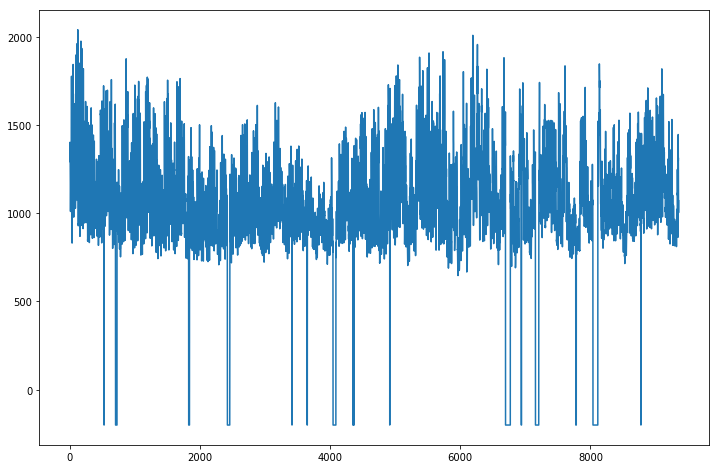

In [6]:
plt.figure(figsize=(12,8))
df['PT08.S1(CO)'].plot();

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [8]:
data = df['PT08.S1(CO)'].dropna()

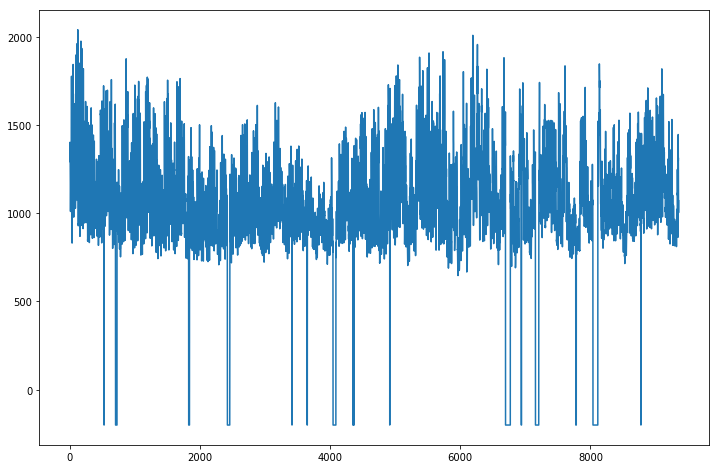

In [9]:
plt.figure(figsize=(12,8))
data.plot();

In [10]:
result = seasonal_decompose(data, model='additive', freq=1)

<Figure size 1080x576 with 0 Axes>

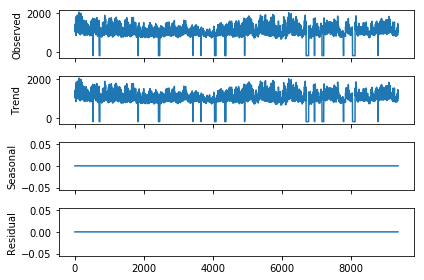

In [11]:
plt.figure(figsize=(15,8))
tmp = result.plot()

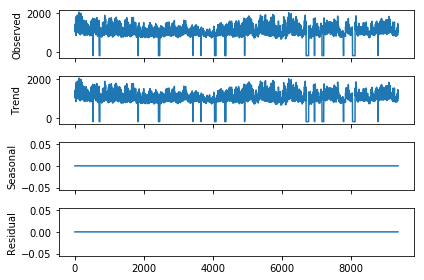

In [12]:
tmp

In [13]:
from statsmodels.tsa.stattools import adfuller

In [14]:
row = ['RW']
result = adfuller(data)

In [15]:
row.extend([result[0], result[1]])
row.append('H0 Accepted' if result[1] > 0.05 else 'H0 Rejected')
pd.DataFrame([row],columns=['Dataset','ADF Statistic','p-value','Result'])

,Dataset,ADF Statistic,p-value,Result
0,RW,-10.690647,3.733641e-19,H0 Rejected


# A série é estacionária!!

In [16]:
from statsmodels.graphics.tsaplots import plot_acf

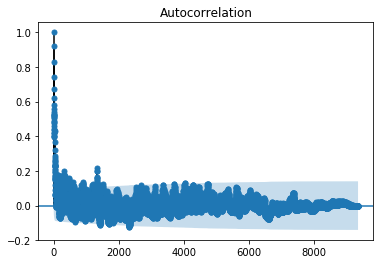

In [17]:
plot_acf(data);

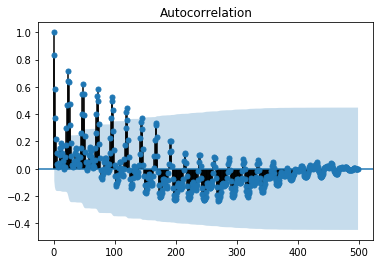

In [18]:
plot_acf(data[:500]);

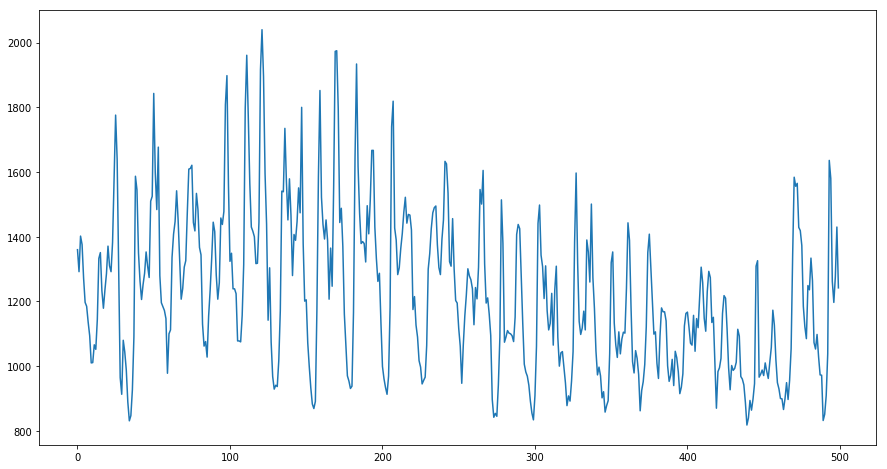

In [19]:
plt.figure(figsize=(15,8))
data[:500].plot();

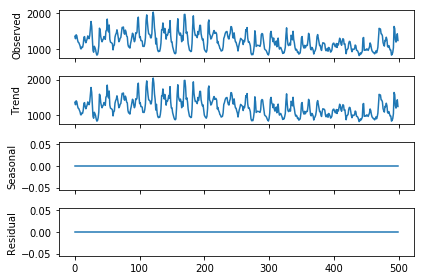

In [20]:
result = seasonal_decompose(data[:500], model='additive', freq=1)

tmp = result.plot()

In [21]:
from scipy.stats import levene

In [22]:
row = ['RW']
ds1, ds2 = data[:250], data[250:]

In [23]:
result = levene(ds1, ds2)

In [24]:
row.extend([result.statistic,result.pvalue])
row.append('H0 Accepted' if result.pvalue > 0.05 else 'H0 Rejected')    
pd.DataFrame([row],columns=['Dataset','Levene Statistic','p-value','Result'])


,Dataset,Levene Statistic,p-value,Result
0,RW,0.851604,0.356123,H0 Accepted


# As variâncias das sub-amostras são iguais

---

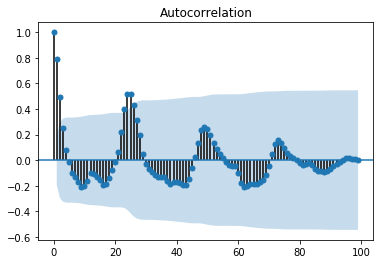

In [25]:
plot_acf(data[:100]);

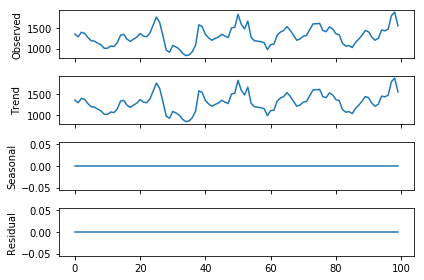

In [26]:
result = seasonal_decompose(data[:100], model='additive', freq=1)

tmp = result.plot()

In [27]:
row = ['RW']
result = adfuller(data)

row.extend([result[0], result[1]])
row.append('H0 Accepted' if result[1] > 0.05 else 'H0 Rejected')
pd.DataFrame([row],columns=['Dataset','ADF Statistic','p-value','Result'])

,Dataset,ADF Statistic,p-value,Result
0,RW,-10.690647,3.733641e-19,H0 Rejected


# A série é estacionária!!


In [28]:
row = ['RW']
ds1, ds2 = data[:50], data[50:]

result = levene(ds1, ds2)

row.extend([result.statistic,result.pvalue])
row.append('H0 Accepted' if result.pvalue > 0.05 else 'H0 Rejected')    
pd.DataFrame([row],columns=['Dataset','Levene Statistic','p-value','Result'])


,Dataset,Levene Statistic,p-value,Result
0,RW,1.886172,0.169667,H0 Accepted


# As variâncias das sub-amostras são iguais

---

In [29]:
print(str(pd.DataFrame([row],columns=['Dataset','Levene Statistic','p-value','Result'])))

  Dataset  Levene Statistic   p-value       Result
0      RW          1.886172  0.169667  H0 Accepted


In [3]:
import TimeSeries_Lab

ModuleNotFoundError: No module named 'TimeSeries_Lab'

In [5]:
t = [1,2,3]
print(*t)

1 2 3


In [7]:
d = {
    'nome': 'Matheus',
    'idade': 21
}

In [13]:
def func(x, y):
    return x * y

In [14]:
func(2,4)

8

In [16]:
d = {
    'x': 2,
    'y': 3 
}

In [18]:
func

TypeError: func() missing 1 required positional argument: 'y'